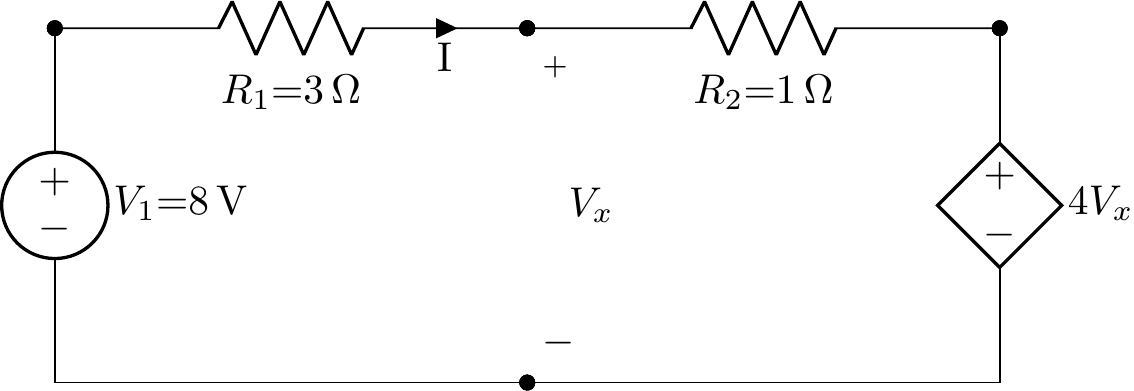

In [1]:
from lcapy import Circuit, V, t
cct = Circuit("""
V1 1 0_1 8; down=1.5
R1 1 x 3; right, size=2, i=I
R2 x 2 1; right, size=2
E1 2 0_2 x 0 4; down, l = 4 V_x
W 0_1 0; right
W 0 0_2; right
Ox x 0; down, v^=V_x
""")
cct.draw(label_ids=True)

Let's determine the current through R1.  There are many ways to solve this; the easiest is to combine the sources, combine the resistances, and then use Ohm's law. The result is a function of V_x:

In [2]:
Vx = V('V_x').Voc
I = (cct.V1.V - 4 * Vx) / (cct.R1.Z + cct.R2.Z)

Now given the current, we can use Ohm's law to determine the voltage drop across R1.

In [3]:
I * cct.R1.Z

{dc: 6 - 3⋅Vₓ}

In [4]:
cct.V1.V - I * cct.R1.Z

{dc: 3⋅Vₓ + 2}

Thus we know that $V_x = 3 V_x + 2$ or $V_x = -1$.  Of course, Lcapy can determine this directly. Here Ox is the name of the open circuit over which we wish to determine the voltage difference:


In [5]:
cct.Ox.V

{dc: -1}

Alternatively, we can query Lcapy for the voltage at node 'x' with respect to ground.  This gives the same result.

In [6]:
cct['x'].V

{dc: -1}

Let's check the current with Lcapy:

In [7]:
cct.R1.I

{dc: 3}

Finally, note if we want the time domain representation we can use:

In [8]:
cct.R1.I(t)

3

or more succintly:

In [9]:
cct.R1.i

3